In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [147]:
data = pd.read_csv("ipl_match_ball_by_ball_data.csv")

C:\Users\Amar Deep\AppData\Local\Temp\ipykernel_24980\1168088726.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("ipl_match_ball_by_ball_data.csv")


In [148]:
data

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.3,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225950,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.4,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225951,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.5,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225952,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.6,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# Get the dimensionality of the data
rows, columns = data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 225954
Number of columns: 22


#### Type of Data

In [119]:
# Display the data types of each column
data_types = data.dtypes
print(data_types)


match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
dtype: object


#### Balancing Data

In [121]:
# Check the class distribution (assuming a binary classification problem)
class_distribution = data['match_id'].value_counts()
print("\nClass Distribution:")
print(class_distribution)


Class Distribution:
1216517    269
392190     267
1082625    263
729315     262
829737     262
          ... 
392183     108
829807     106
598068     100
501265      63
1178424     51
Name: match_id, Length: 950, dtype: int64


In [122]:
# Assuming 'match_id' is the target variable, and 'yes' is the minority class
X = data.drop('match_id', axis=1)
y = data['match_id']
# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Check the class distribution after balancing
balanced_class_distribution = Counter(y_resampled)
print("\nBalanced Class Distribution:")
print(balanced_class_distribution)


Balanced Class Distribution:
Counter({335982: 269, 335983: 269, 335984: 269, 335986: 269, 335985: 269, 335987: 269, 335988: 269, 335989: 269, 335990: 269, 335991: 269, 335993: 269, 335992: 269, 335994: 269, 335995: 269, 335996: 269, 335997: 269, 335998: 269, 336000: 269, 335999: 269, 336001: 269, 336003: 269, 336034: 269, 336005: 269, 336004: 269, 336006: 269, 336007: 269, 336008: 269, 336009: 269, 336010: 269, 336011: 269, 336013: 269, 336014: 269, 336015: 269, 336016: 269, 336017: 269, 336018: 269, 336020: 269, 336021: 269, 336023: 269, 336022: 269, 336024: 269, 336025: 269, 336026: 269, 336027: 269, 336028: 269, 336029: 269, 336031: 269, 336032: 269, 336033: 269, 336002: 269, 336035: 269, 336036: 269, 336037: 269, 336012: 269, 336019: 269, 336038: 269, 336039: 269, 336040: 269, 392182: 269, 392181: 269, 392183: 269, 392184: 269, 392185: 269, 392186: 269, 392188: 269, 392189: 269, 392190: 269, 392191: 269, 392192: 269, 392194: 269, 392195: 269, 392196: 269, 392197: 269, 392198: 269,

In [128]:
# Assuming 'numeric_columns' is a list of column names that contain numerical data
numeric_columns = ['match_id', 'ball', 'runs_off_bat', 'extras', 'innings']  # Adjust this list based on your specific dataset

# Extract the numerical features
X_numeric = data[numeric_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform it
X_numeric_standardized = scaler.fit_transform(X_numeric)

# Replace the original numerical columns with the standardized ones
data[numeric_columns] = X_numeric_standardized
data[numeric_columns]
# Now data contains the standardized numerical features 

,match_id,ball,runs_off_bat,extras,innings
0,-1.467850,-1.662144,-0.768479,2.732583,-0.961769
1,-1.467850,-1.644551,-0.768479,-0.195940,-0.961769
2,-1.467850,-1.626958,-0.768479,2.732583,-0.961769
3,-1.467850,-1.609364,-0.768479,-0.195940,-0.961769
4,-1.467850,-1.591771,-0.768479,-0.195940,-0.961769
...,...,...,...,...,...
225949,1.420766,1.363908,-0.150494,-0.195940,1.025897
225950,1.420766,1.381502,-0.768479,-0.195940,1.025897
225951,1.420766,1.399095,-0.150494,-0.195940,1.025897
225952,1.420766,1.416688,0.467491,-0.195940,1.025897


3-Why is PCA needed? How many PCAs are needed for any dataset. Justify your choice
with respect to your dataset.

Ans:- Principal Component Analysis (PCA) is a dimensionality reduction technique that is used for various purposes in data analysis and machine learning. 
1.Dimensionality Reduction, 2.Noise Reduction, 3.Data Compression, 4.Anomaly Detection.


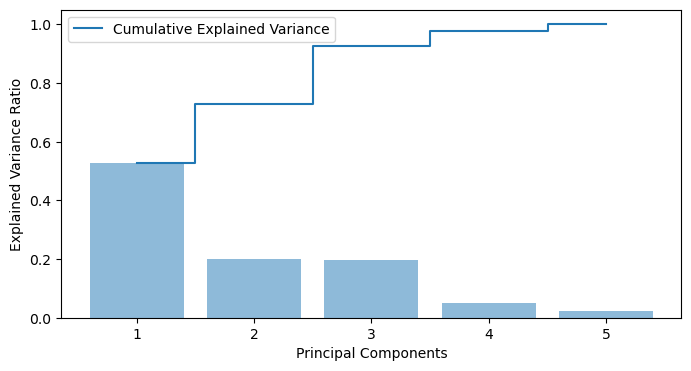

In [129]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Assuming 'X_numeric' is your feature matrix
pca = PCA()
pca.fit(X_numeric)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

# Plot explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.show()


4.Show and explain all components of the PCA algorithm used on your dataset. Use
suitable Data Visualization techniques according to your dataset.


Ans- Assuming you have already loaded and preprocessed the dataset (including standardization if needed), here are the components and steps of PCA:

Step 1: Data Standardization
Before applying PCA, it's a good practice to standardize the data, ensuring that each feature (variable) has a mean of 0 and a standard deviation of 1. Standardization helps when features are measured on different scales.

Step 2: Covariance Matrix Calculation
The first step in PCA is to calculate the covariance matrix of the standardized data. The covariance matrix describes how each feature varies with respect to every other feature in the dataset. It is represented as Σ (sigma).

Step 3: Eigendecomposition of the Covariance Matrix
In this step, we perform an eigendecomposition of the covariance matrix. This means we calculate the eigenvalues and eigenvectors of the covariance matrix.

   Eigenvalues (λ): Eigenvalues represent the amount of variance explained by each principal component. They are typically    sorted in descending order, so the first eigenvalue (λ1) corresponds to the first principal component, the second          eigenvalue (λ2) to the second PC, and so on.

   Eigenvectors (v): Eigenvectors are the directions in which the data varies the most. Each eigenvector corresponds to a      principal component. These are unit vectors, so their length is 1.

Step 4: Selecting Principal Components
After calculating the eigenvalues and eigenvectors, you need to decide how many principal components to retain. Common methods for selection include:

   Explained Variance: You can examine the proportion of total variance explained by each principal component and select a    threshold (e.g., retaining PCs that collectively explain 95% of the variance).

   Scree Plot: Plotting the eigenvalues and selecting the point on the scree plot where the eigenvalues start to level off    (the "elbow" point).

Step 5: Projection of Data
The selected principal components form a new basis for your data. You can project the original data onto this new basis to obtain lower-dimensional representations of your data.


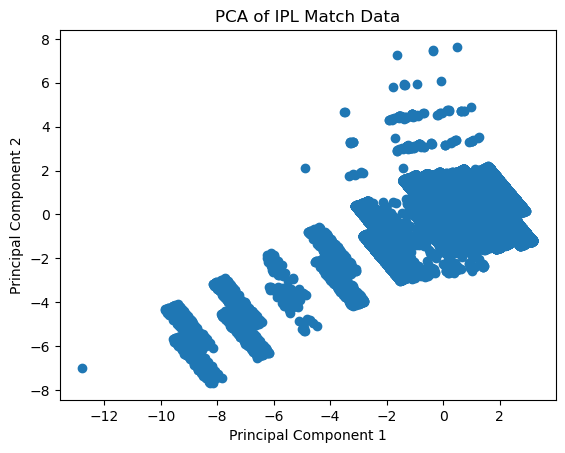

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_numeric = data[numeric_columns]
scaled_data = scaler.fit_transform(X_numeric)

#Covariance Matrix Calculation:
cov_matrix = np.cov(scaled_data.T)

#Eigenvalue and Eigenvector Calculation:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

#Sort Eigenvalues
eigenvalue_indices = np.argsort(eig_values)[::-1]
k = 2  # Choose the number of principal components to retain
top_eigenvalue_indices = eigenvalue_indices[:k]
top_eigenvectors = eig_vectors[:, top_eigenvalue_indices]
reduced_data = scaled_data.dot(top_eigenvectors)
import matplotlib.pyplot as plt

# Create a scatter plot of the reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IPL Match Data')
plt.show()


Question-5. State the advantages and disadvantages along with applications of PCA.

### 1.Advantages of PCA:

Dimensionality Reduction: PCA helps reduce the dimensionality of the data by transforming it into a lower-dimensional space while retaining most of the original data's variance. This simplifies data analysis and visualization.

Noise Reduction: PCA can help reduce the impact of noise in the data by focusing on the directions with the highest variance. This can improve the performance of machine learning models.

Interpretability: The principal components generated by PCA are linear combinations of the original features. This often results in more interpretable and meaningful representations of data.

Visualizations: PCA is useful for data visualization. It can reduce high-dimensional data to two or three dimensions, allowing for easy plotting and visualization.

Feature Engineering: PCA can be used as a feature engineering technique to create new features that capture the most important information in the data.

Data Compression: PCA can be used for data compression and storage, particularly in scenarios where storage space is limited.

### 2.Disadvantages of PCA:

Loss of Interpretability: While PCA improves interpretability to some extent, the principal components themselves may not have clear, easily understandable meanings, especially in high-dimensional datasets.

Linearity Assumption: PCA assumes that the relationships between variables are linear. If the data has nonlinear relationships, PCA may not be the most effective technique.

Information Loss: PCA discards some variance in the data, especially when you reduce the dimensionality significantly. This can lead to some loss of information, which may be critical in some applications.

Sensitivity to Scaling: PCA is sensitive to the scaling of variables. Standardization (scaling to mean=0, std=1) is typically applied, but the choice of scaling can affect the results.

Computational Complexity: For large datasets with many features, PCA can be computationally expensive, both in terms of memory and processing time.

### 3.Applications of PCA:

Image Compression: PCA is used in image compression techniques to reduce the storage requirements of images while retaining image quality.

Face Recognition: PCA is applied to facial recognition systems to reduce the dimensionality of facial features and improve recognition accuracy.

Genomics: PCA is used in genomics to analyze gene expression data and identify patterns in gene expression profiles.

Finance: PCA is applied in finance for risk management, portfolio optimization, and modeling financial time series data.

Natural Language Processing (NLP): PCA can be used to reduce the dimensionality of text data, making it easier to process and analyze large text corpora.

Bioinformatics: PCA is used in bioinformatics for clustering, classification, and visualization of high-dimensional biological data.

Quality Control: In manufacturing and quality control, PCA is applied to detect defects, reduce variability, and improve product quality.

Environmental Science: PCA is used to analyze environmental data, such as air and water quality measurements, to identify pollution sources and trends.

Market Research: PCA is applied in market research to analyze consumer behavior data and identify underlying factors that influence purchasing decisions.